# MFG Absenteeism Analysis
dataset info:

Title: Absenteeism Dataset

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/HRAnalyticRepository/absenteeism-dataset

Date Accessed: October 2, 2023

In [43]:
# Importing python libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
# Preparing the dataset into a python data frame for processing and analysis
df = pd.read_csv('MFGEmployees4.csv')

In [45]:
# Exploratory data analysis
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   EmployeeNumber    Surname GivenName Gender             City JobTitle  \
0               1  Gutierrez     Molly      F          Burnaby    Baker   
1               2   Hardwick   Stephen      M        Courtenay    Baker   
2               3    Delgado   Chester      M         Richmond    Baker   
3               4      Simon     Irene      F         Victoria    Baker   
4               5   Delvalle    Edward      M  New Westminster    Baker   

  DepartmentName    StoreLocation Division        Age  LengthService  \
0         Bakery          Burnaby   Stores  32.028816       6.018478   
1         Bakery          Nanaimo   Stores  40.320902       5.532445   
2         Bakery         Richmond   Stores  48.822047       4.389973   
3         Bakery         Victoria   Stores  44.599357       3.081736   
4         Bakery  New Westminster   Stores  35.697876       3.619091   

   AbsentHours BusinessUnit  
0    36.577306       Stores  
1    30.165072       Stores  
2    83.807798       Store

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


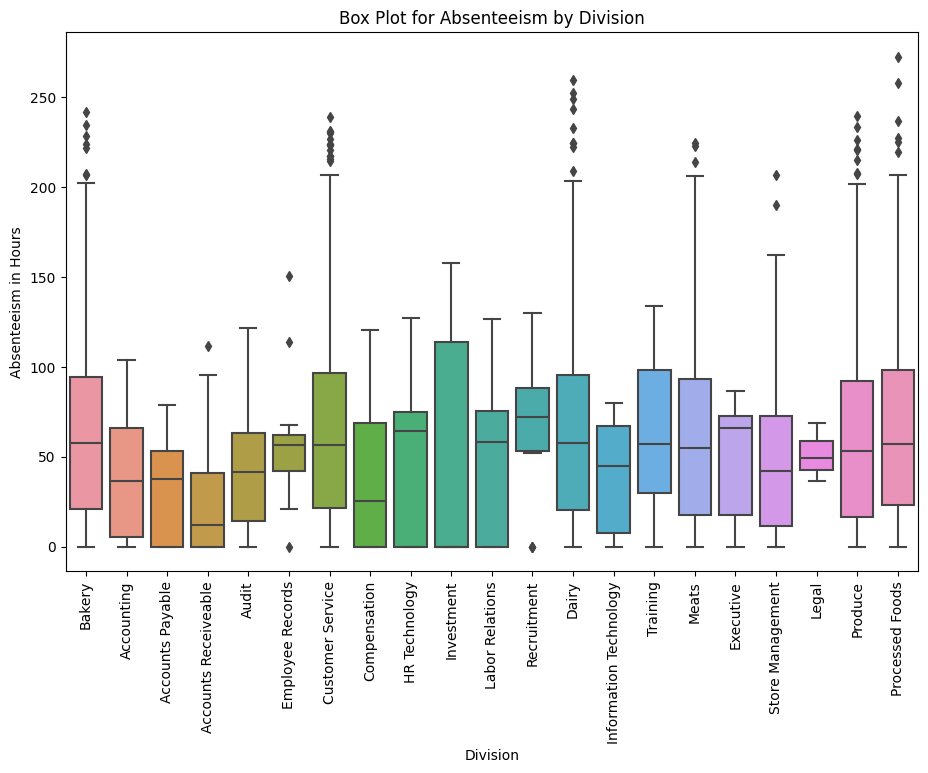

In [46]:
# visualizing the monthly income by department using a box plot
plt.figure(figsize=(11, 7))
sns.boxplot(x='DepartmentName', y='AbsentHours', data=df)

# adding graph information
plt.xlabel('Division')
plt.ylabel('Absenteeism in Hours')
plt.title('Box Plot for Absenteeism by Division')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Running a decission tree regressor analyis to predict absenteeism

# Encoding categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Defining features (X) and target (y)
X = df.drop(columns=['AbsentHours', 'Surname', 'GivenName'])
y = df['AbsentHours']

# Spliting the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Evaluating the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1241.4663443357415
R-squared (R2): 0.4530133013686848
